# **Import Necessery Libraries**

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Load your data
df = pd.read_csv('/kaggle/input/drug-performance-evaluation/Drug_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    685 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          685 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


In [4]:
df.isnull().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64

In [5]:
df.head(20)

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX
5,Acute Bacterial Sinusitis,Ampicillin Sodium,3.000000,3.000000,Tablet,Off Label,143.215000,1.000000,3.000000,RX
6,Acute Bacterial Sinusitis,Azithromycin,4.091667,3.341667,Tablet,On Label,32.100000,490.000000,2.758333,RX
7,Acute Bacterial Sinusitis,Clarithromycin,3.582000,3.458000,Tablet,On Label,99.490000,141.600000,2.780000,RX
8,Acute Bacterial Sinusitis,Erythromycin,2.895000,3.255000,Tablet,On Label,125.240000,41.000000,2.510000,RX
9,Acute Bacterial Sinusitis,Erythromycin Ethylsuccinate,2.944444,3.277778,Liquid (Drink),On Label,332.630000,3.666667,3.222222,RX


In [6]:
df.describe()

,EaseOfUse,Effective,Price,Reviews,Satisfaction
count,685.000000,685.000000,685.000000,685.000000,685.000000
mean,3.920038,3.523530,174.211183,82.644410,3.195699
std,0.894212,0.954126,667.743466,273.281398,1.030442
min,1.000000,1.000000,4.000000,1.000000,1.000000
25%,3.556667,3.000000,15.490000,3.000000,2.575000
50%,4.050000,3.600000,49.990000,10.350877,3.200000
75%,4.500000,4.110000,145.990000,57.000000,3.901250
max,5.000000,5.000000,10362.190000,4647.000000,5.000000


# **Descriptive Statistics**

In [7]:
# For numerical columns
numerical_columns = ['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']
for col in numerical_columns:
    print(f"Column: {col}")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Standard Deviation:", df[col].std())
    print("\n")

# For categorical columns
categorical_columns = ['Condition', 'Drug', 'Indication', 'Type', 'Form']
for col in categorical_columns:
    print(f"Column: {col}")
    print("Mode:", df[col].mode()[0])
    print("Unique values:", df[col].nunique())
    print("\n")


Column: EaseOfUse
Mean: 3.9200381987180064
Median: 4.05
Mode: 5.0
Standard Deviation: 0.8942123272348537


Column: Effective
Mean: 3.5235301184754335
Median: 3.6
Mode: 5.0
Standard Deviation: 0.954125828481957


Column: Reviews
Mean: 82.64440996548164
Median: 10.350877192982455
Mode: 1.0
Standard Deviation: 273.2813981080835


Column: Satisfaction
Mean: 3.1956990665348313
Median: 3.2
Mode: 5.0
Standard Deviation: 1.030441640842835


Column: Price
Mean: 174.21118319718087
Median: 49.99
Mode: 11.99
Standard Deviation: 667.7434664803834


Column: Condition
Mode: hypertension
Unique values: 37


Column: Drug
Mode: Niacin
Unique values: 470


Column: Indication
Mode: On Label
Unique values: 3


Column: Type
Mode: RX
Unique values: 4


Column: Form
Mode: Tablet
Unique values: 6




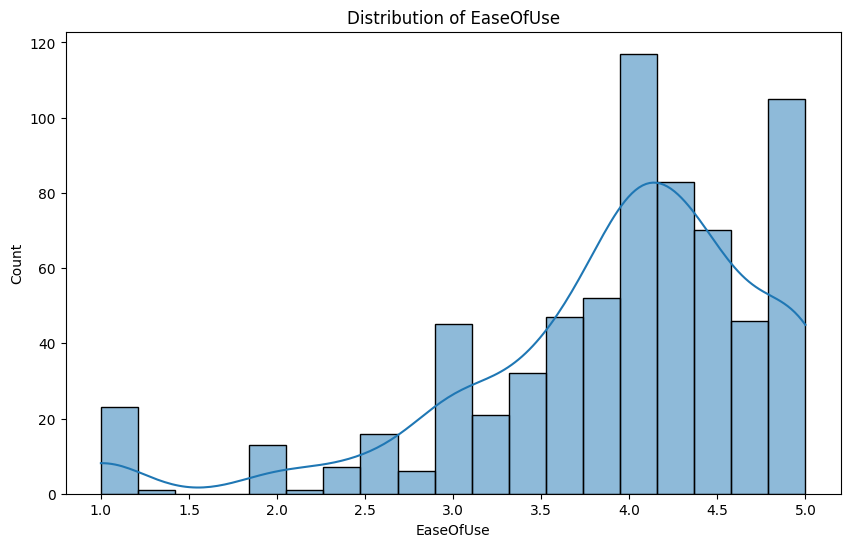

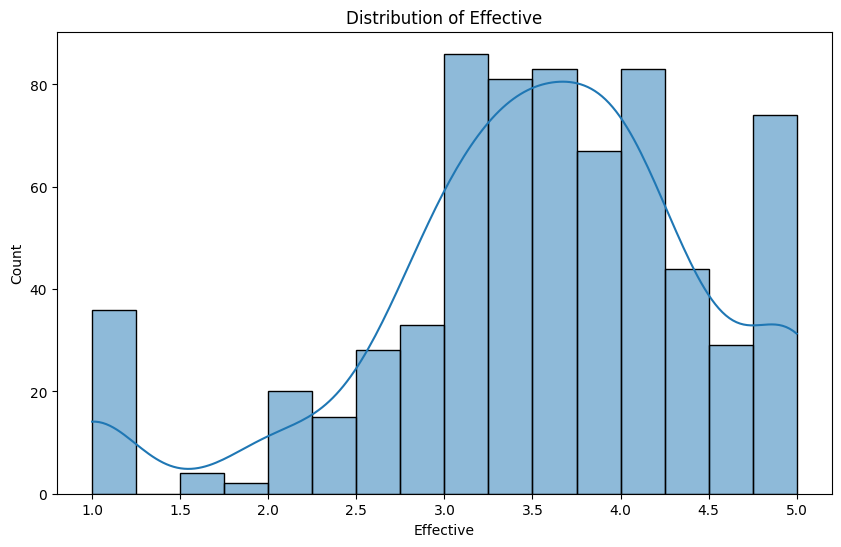

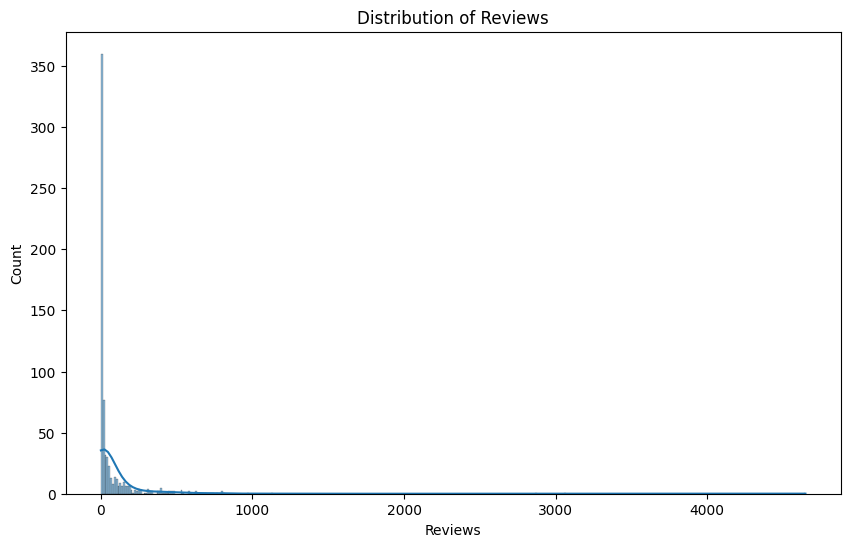

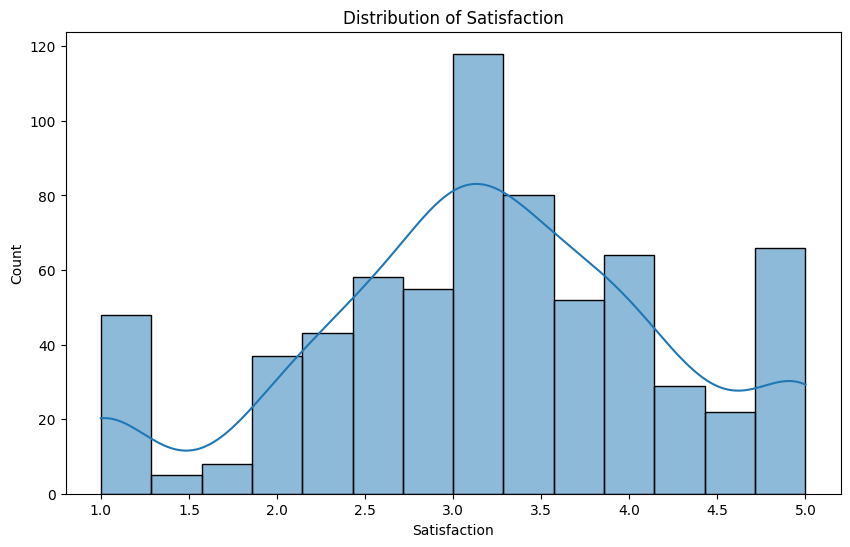

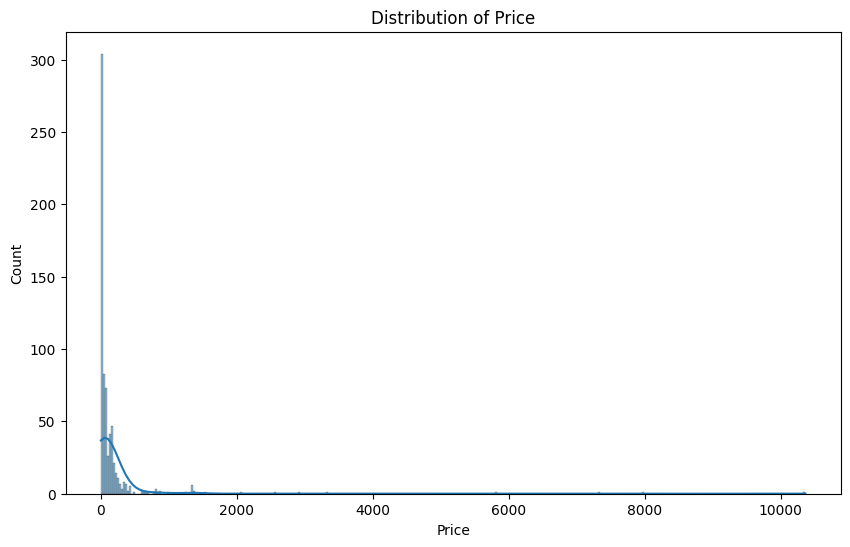

In [8]:
# For numerical columns
numerical_columns = ['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

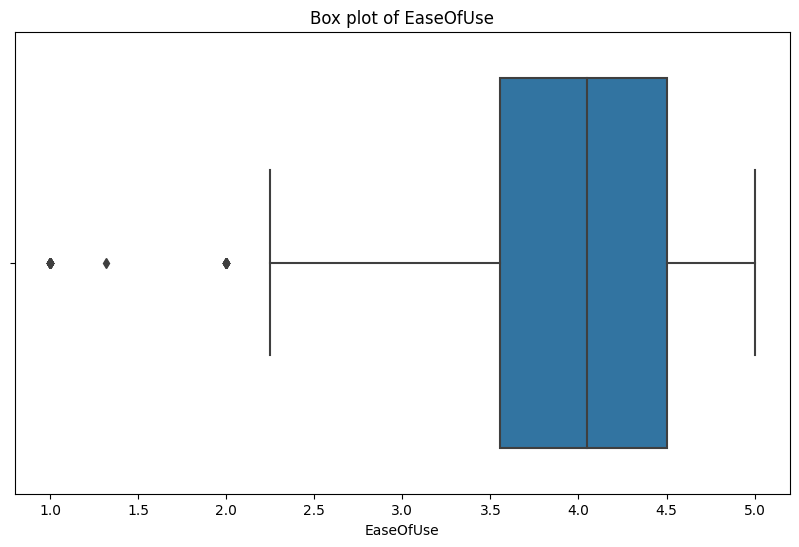

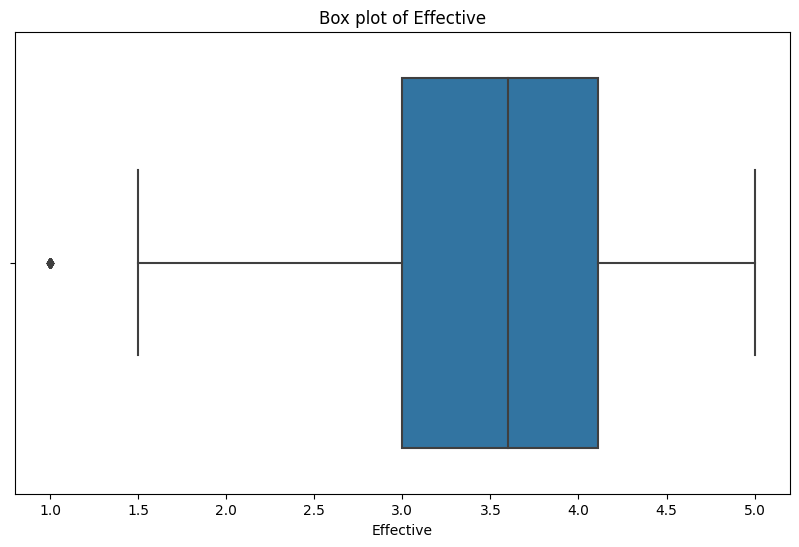

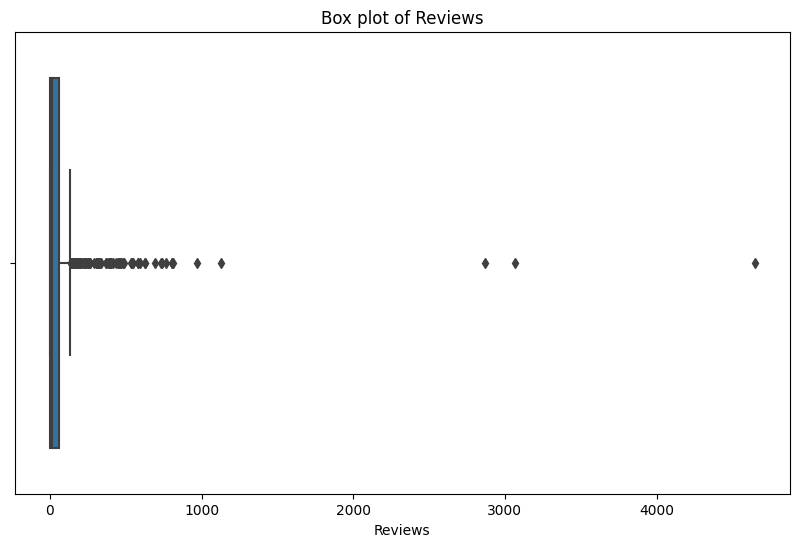

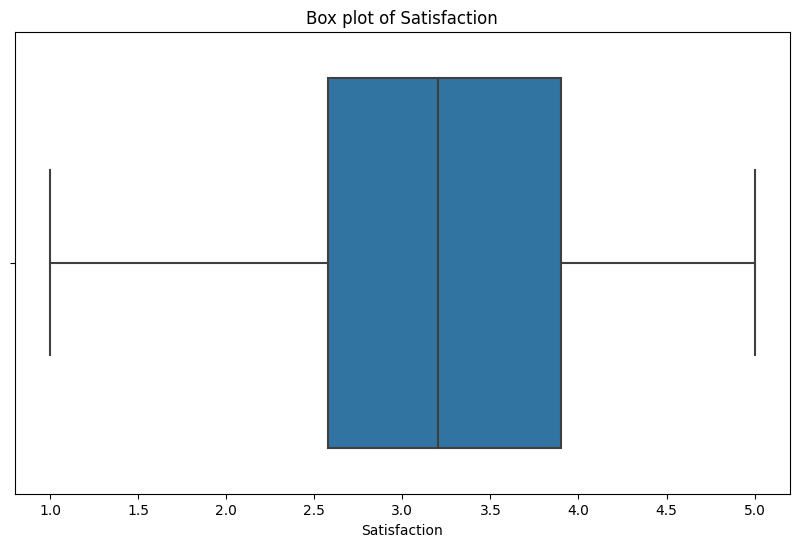

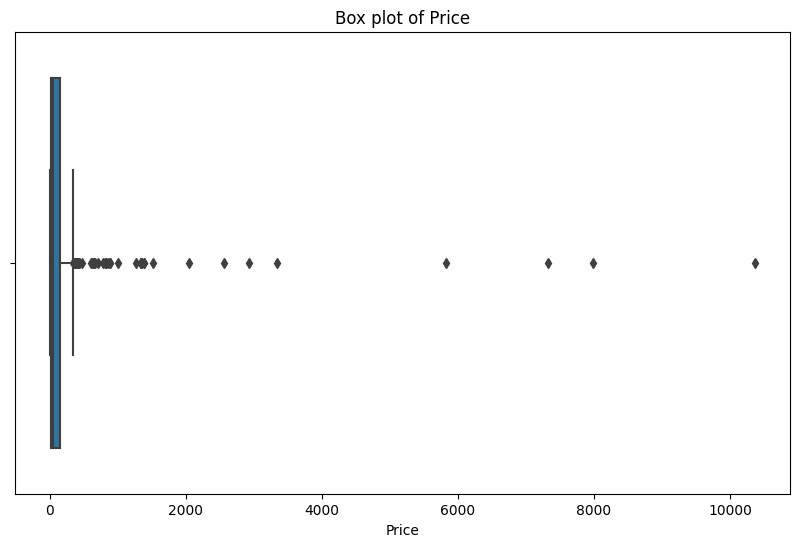

In [9]:
# Box plot for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

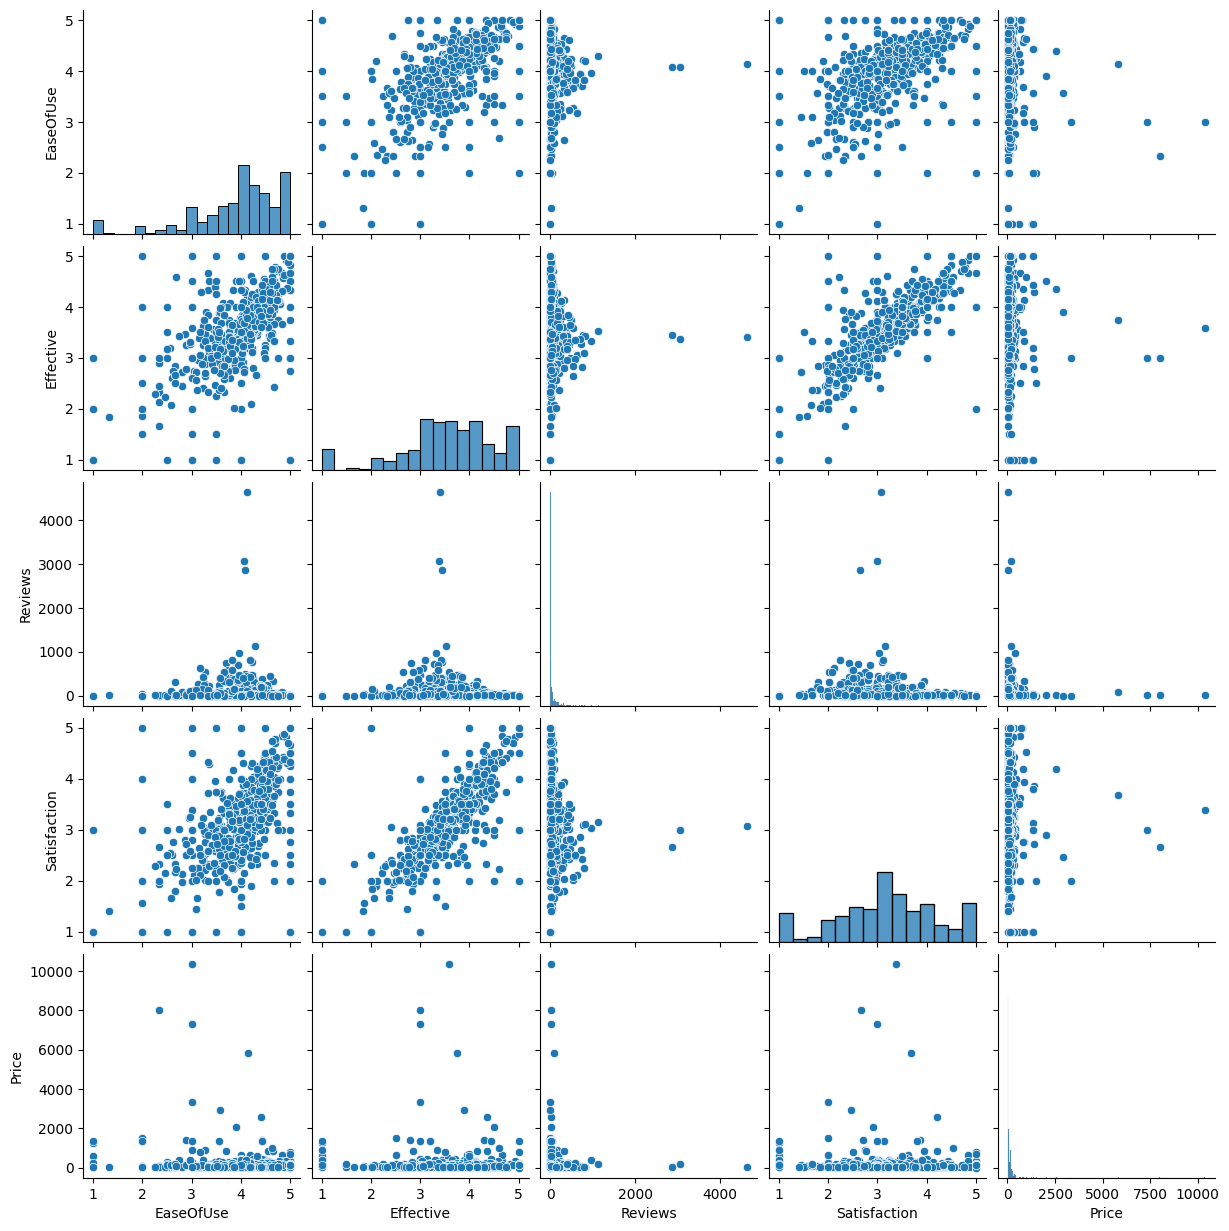

In [10]:
# Pair plot for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()

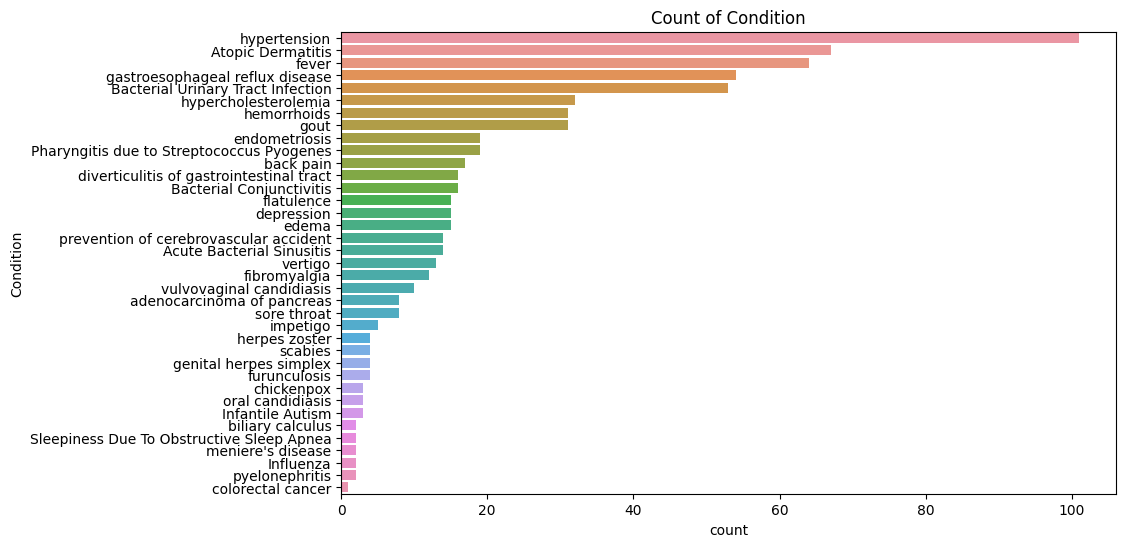

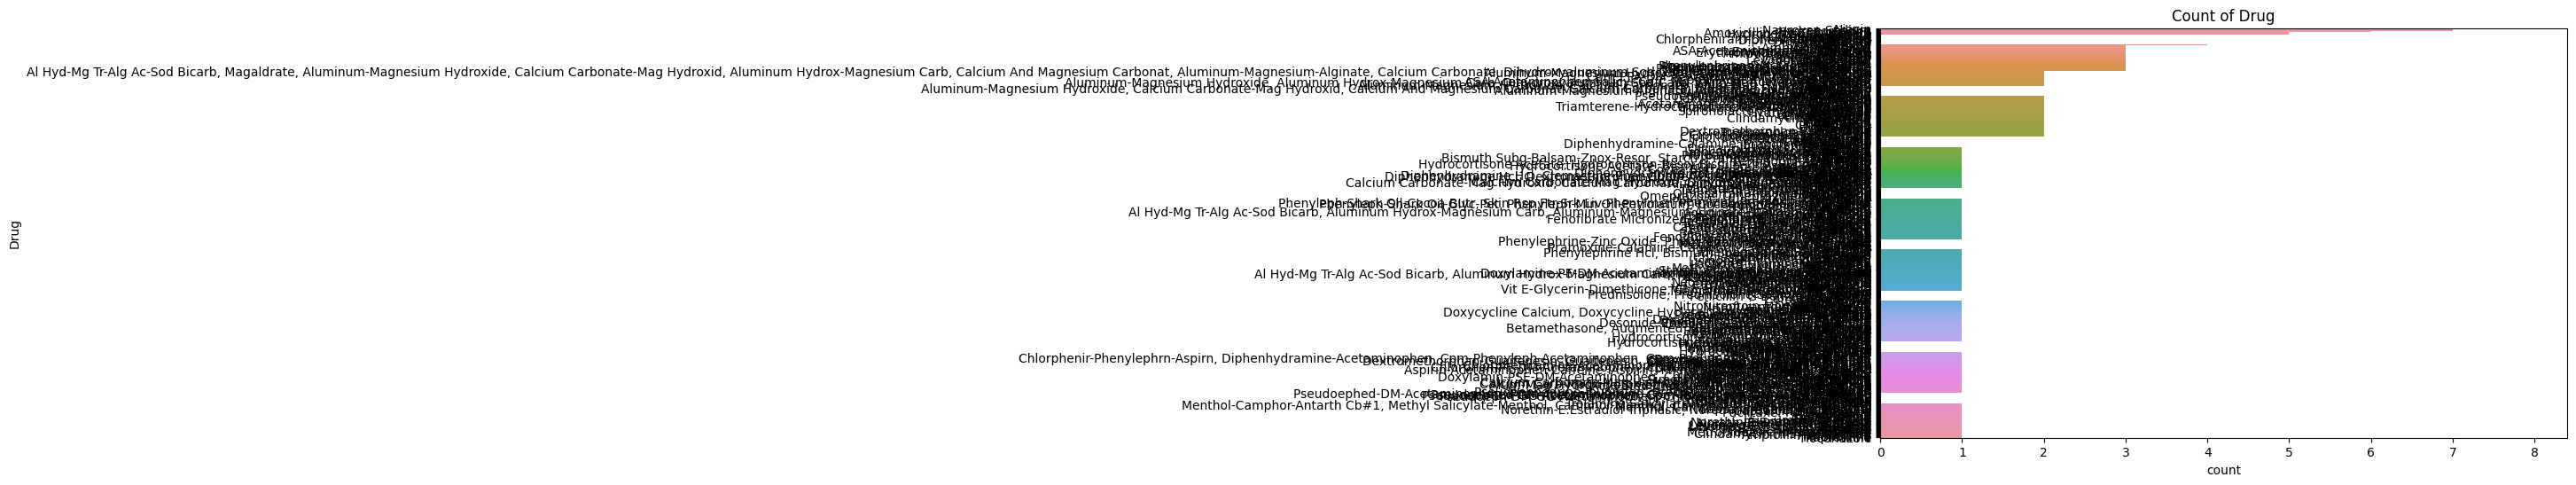

) missing from current font.te-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


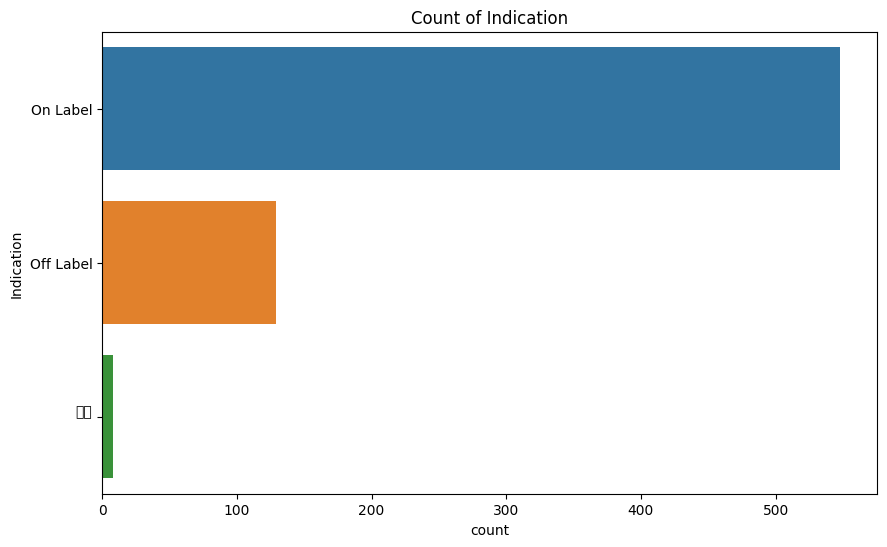

) missing from current font.te-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


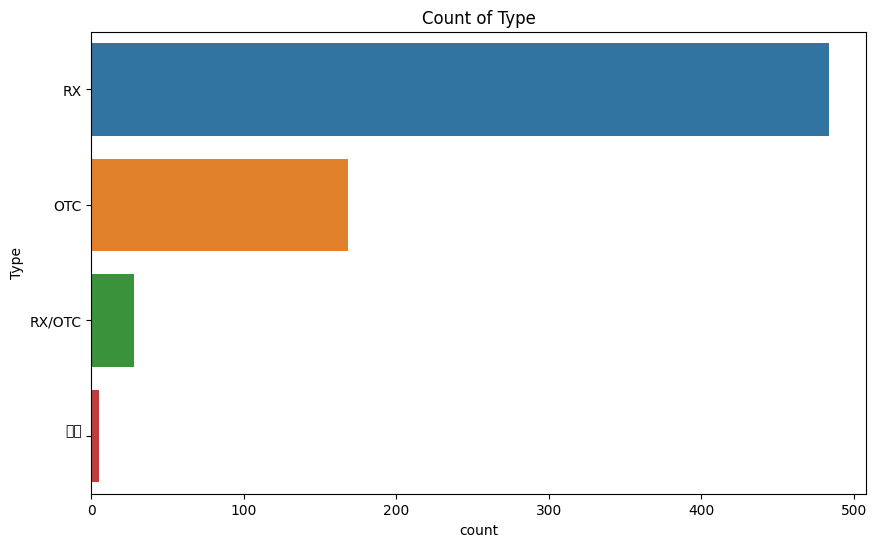

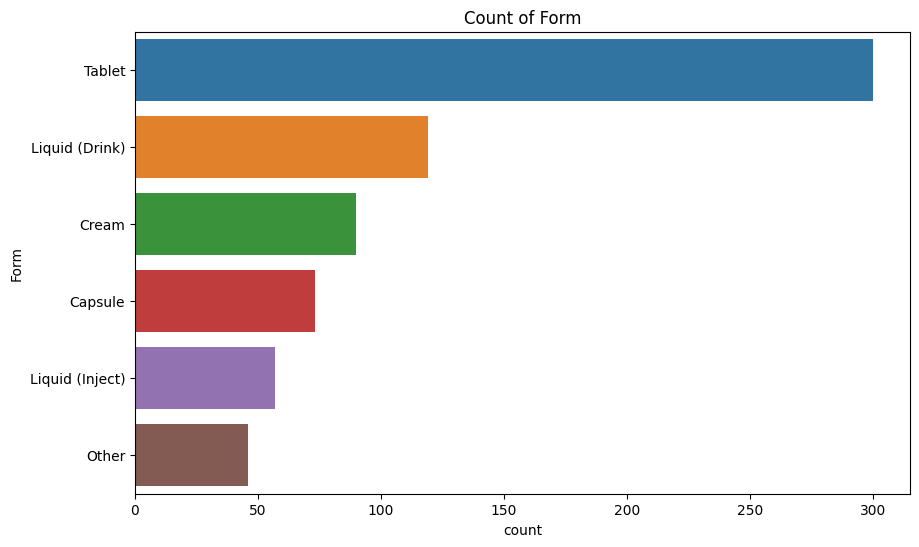

In [11]:
# For categorical columns
categorical_columns = ['Condition', 'Drug', 'Indication', 'Type', 'Form']
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    chart = sns.countplot(data=df, y=col, order = df[col].value_counts().index)
    chart.set_title(f'Count of {col}')
    plt.show()

# **Data Grouping**

In [12]:
# Group by 'Condition' and calculate mean for numerical columns
grouped_condition = df.groupby('Condition')[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].mean()

# Group by 'Drug' and calculate mean for numerical columns
grouped_drug = df.groupby('Drug')[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].mean()

# Group by 'Type' and calculate mean for numerical columns
grouped_type = df.groupby('Type')[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].mean()

# Group by 'Form' and calculate mean for numerical columns
grouped_form = df.groupby('Form')[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].mean()

# Group by multiple columns
grouped_multiple = df.groupby(['Condition', 'Drug', 'Type', 'Form'])[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].mean()

In [13]:
# Print the results
print("Grouped by Condition:")
print(grouped_condition)

print("\nGrouped by Drug:")
print(grouped_drug)

print("\nGrouped by Type:")
print(grouped_type)

print("\nGrouped by Form:")
print(grouped_form)

print("\nGrouped by Condition, Drug, Type, and Form:")
print(grouped_multiple)

# Or sort the groups by a specific column
print("\nSorted 'grouped_drug' by 'Price':")
print(grouped_drug.sort_values('Price'))

# You can also filter the groups based on a condition
print("\nFiltered 'grouped_drug' where 'Satisfaction' > 4:")
print(grouped_drug[grouped_drug['Satisfaction'] > 4])


Grouped by Condition:
                                           EaseOfUse  Effective     Reviews  \
Condition                                                                     
Acute Bacterial Sinusitis                   3.191969   3.148799  136.174750   
Atopic Dermatitis                           3.955673   3.620505   32.446556   
Bacterial Conjunctivitis                    3.700149   2.994182   11.123512   
Bacterial Urinary Tract Infection           3.430511   3.225619   75.553418   
Infantile Autism                            3.845000   3.302500  117.083333   
Influenza                                   3.077500   2.827500  196.500000   
Pharyngitis due to Streptococcus Pyogenes   3.468117   3.167655   70.327493   
Sleepiness Due To Obstructive Sleep Apnea   4.412500   4.047500  258.250000   
adenocarcinoma of pancreas                  2.894167   3.248333   20.479167   
back pain                                   4.194540   4.073377    7.730567   
biliary calculus              

# **Correlation Analysis**

              EaseOfUse  Effective   Reviews  Satisfaction     Price
EaseOfUse      1.000000   0.659237  0.011962      0.650156 -0.107480
Effective      0.659237   1.000000 -0.035802      0.864863 -0.017532
Reviews        0.011962  -0.035802  1.000000     -0.084216 -0.024927
Satisfaction   0.650156   0.864863 -0.084216      1.000000 -0.024800
Price         -0.107480  -0.017532 -0.024927     -0.024800  1.000000


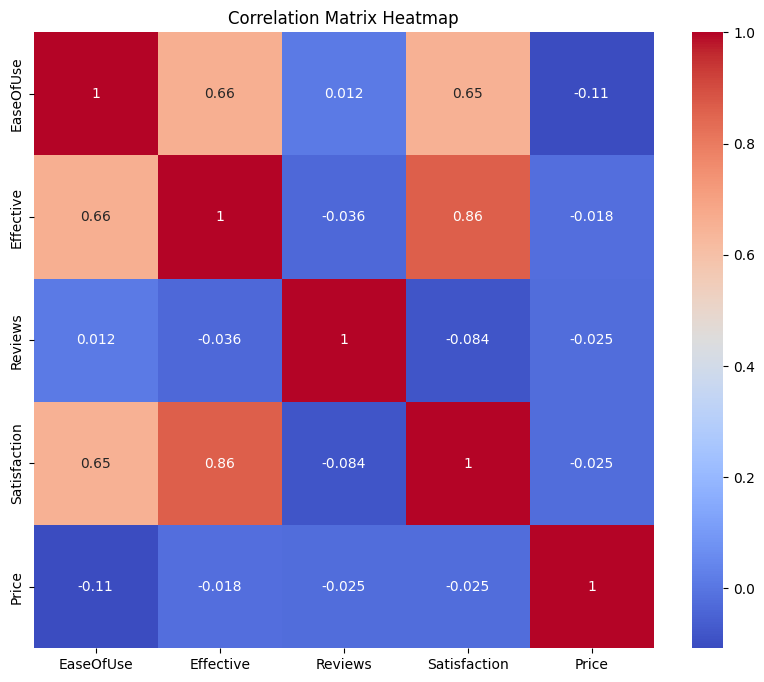

In [14]:
# Calculate the correlation matrix
corr_matrix = df[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


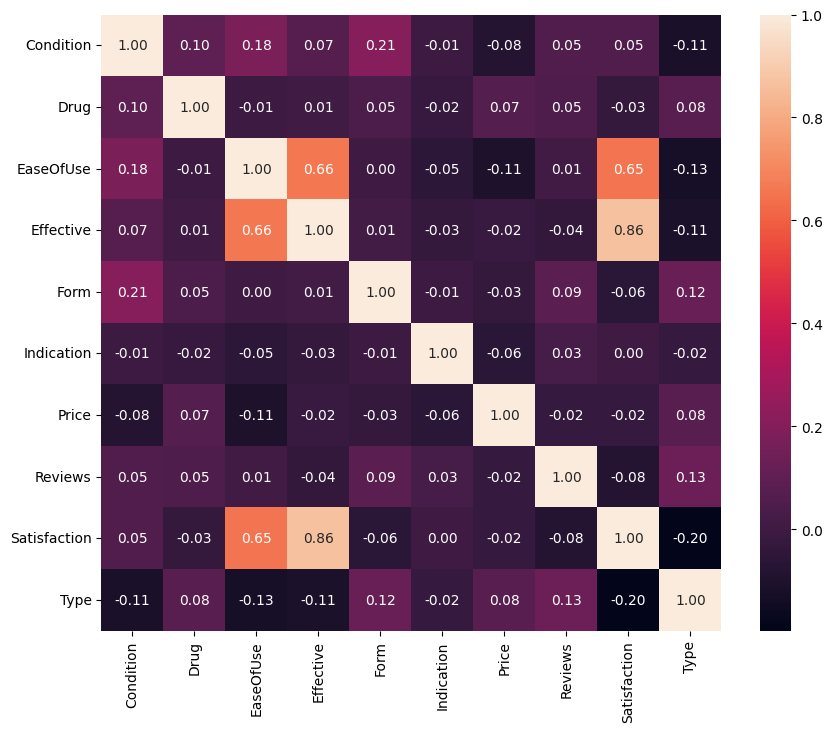

In [15]:
# Encoding non-numerical columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Calculating correlation matrix
corr = df.corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# **Visualization**

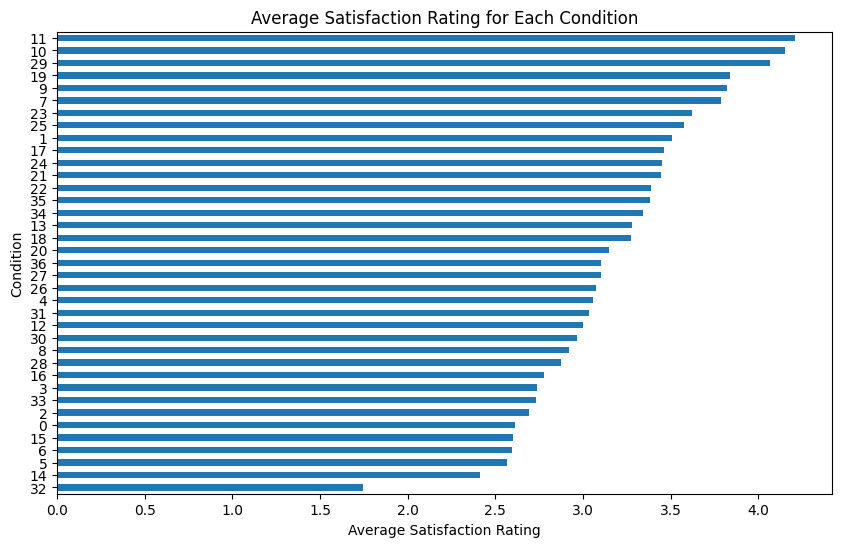

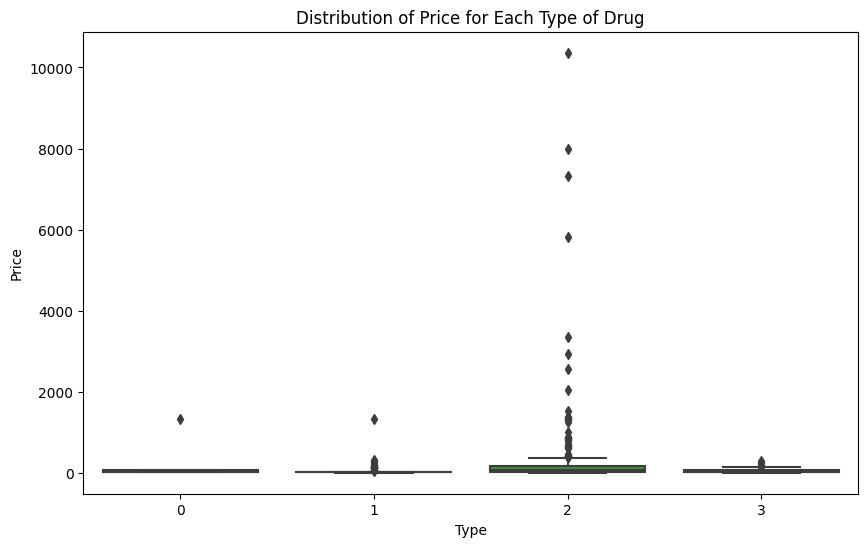

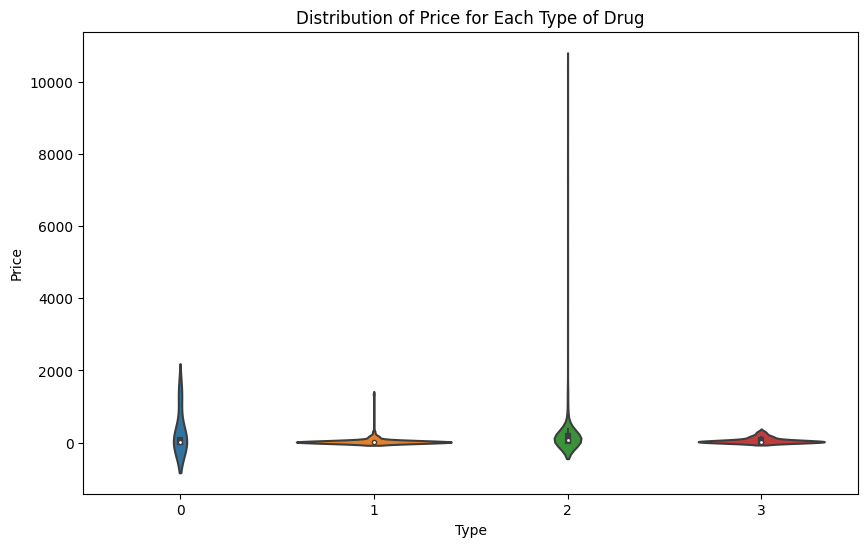

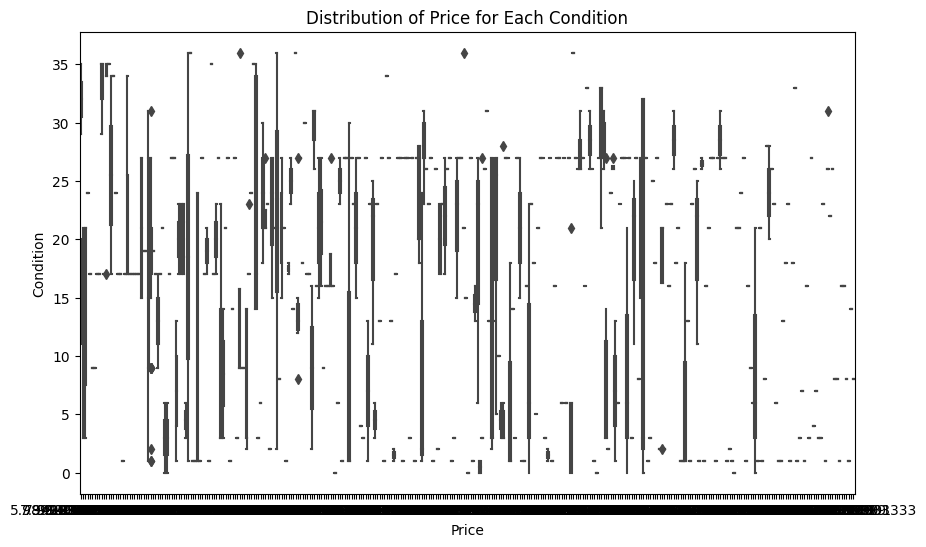

In [16]:
# Bar chart showing the average 'Satisfaction' rating for each 'Condition'
plt.figure(figsize=(10,6))
df.groupby('Condition')['Satisfaction'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average Satisfaction Rating')
plt.title('Average Satisfaction Rating for Each Condition')
plt.show()

# Box plot showing the distribution of 'Price' for each 'Type' of drug
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Distribution of Price for Each Type of Drug')
plt.show()

# Violin plot showing the distribution of 'Price' for each 'Type' of drug
plt.figure(figsize=(10,6))
sns.violinplot(x='Type', y='Price', data=df)
plt.title('Distribution of Price for Each Type of Drug')
plt.show()

# Scatter plot with 'Price' on the x-axis and 'Satisfaction' on the y-axis, colored by 'Type'
fig = px.scatter(df, x='Price', y='Satisfaction', color='Type')
fig.update_layout(title='Satisfaction vs Price Colored by Type')
fig.show()

# Box plot of 'Price' for each 'Condition', sorted by median 'Price'
plt.figure(figsize=(10,6))
df_sorted = df.sort_values('Condition', key=lambda col: df.groupby('Condition')['Price'].median().loc[col])
sns.boxplot(x='Price', y='Condition', data=df_sorted)
plt.title('Distribution of Price for Each Condition')
plt.show()


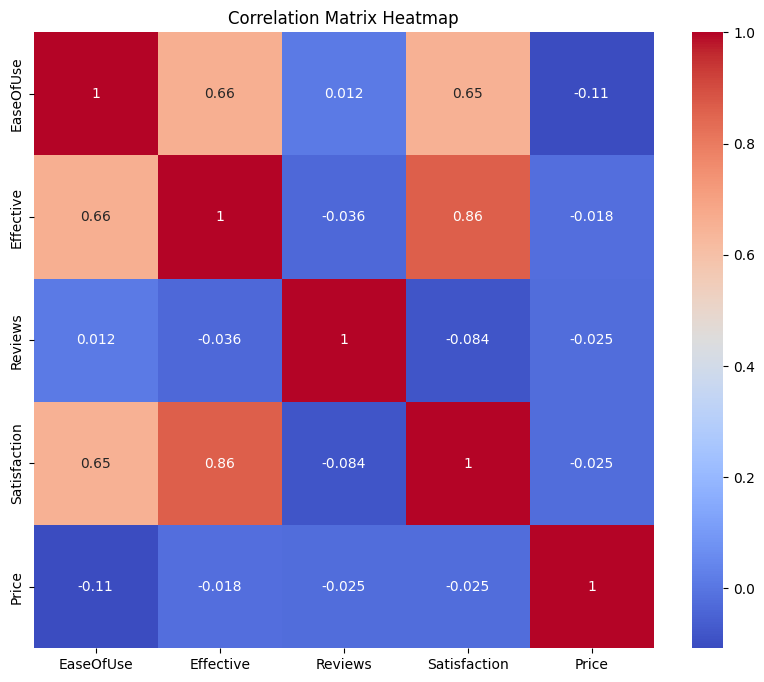

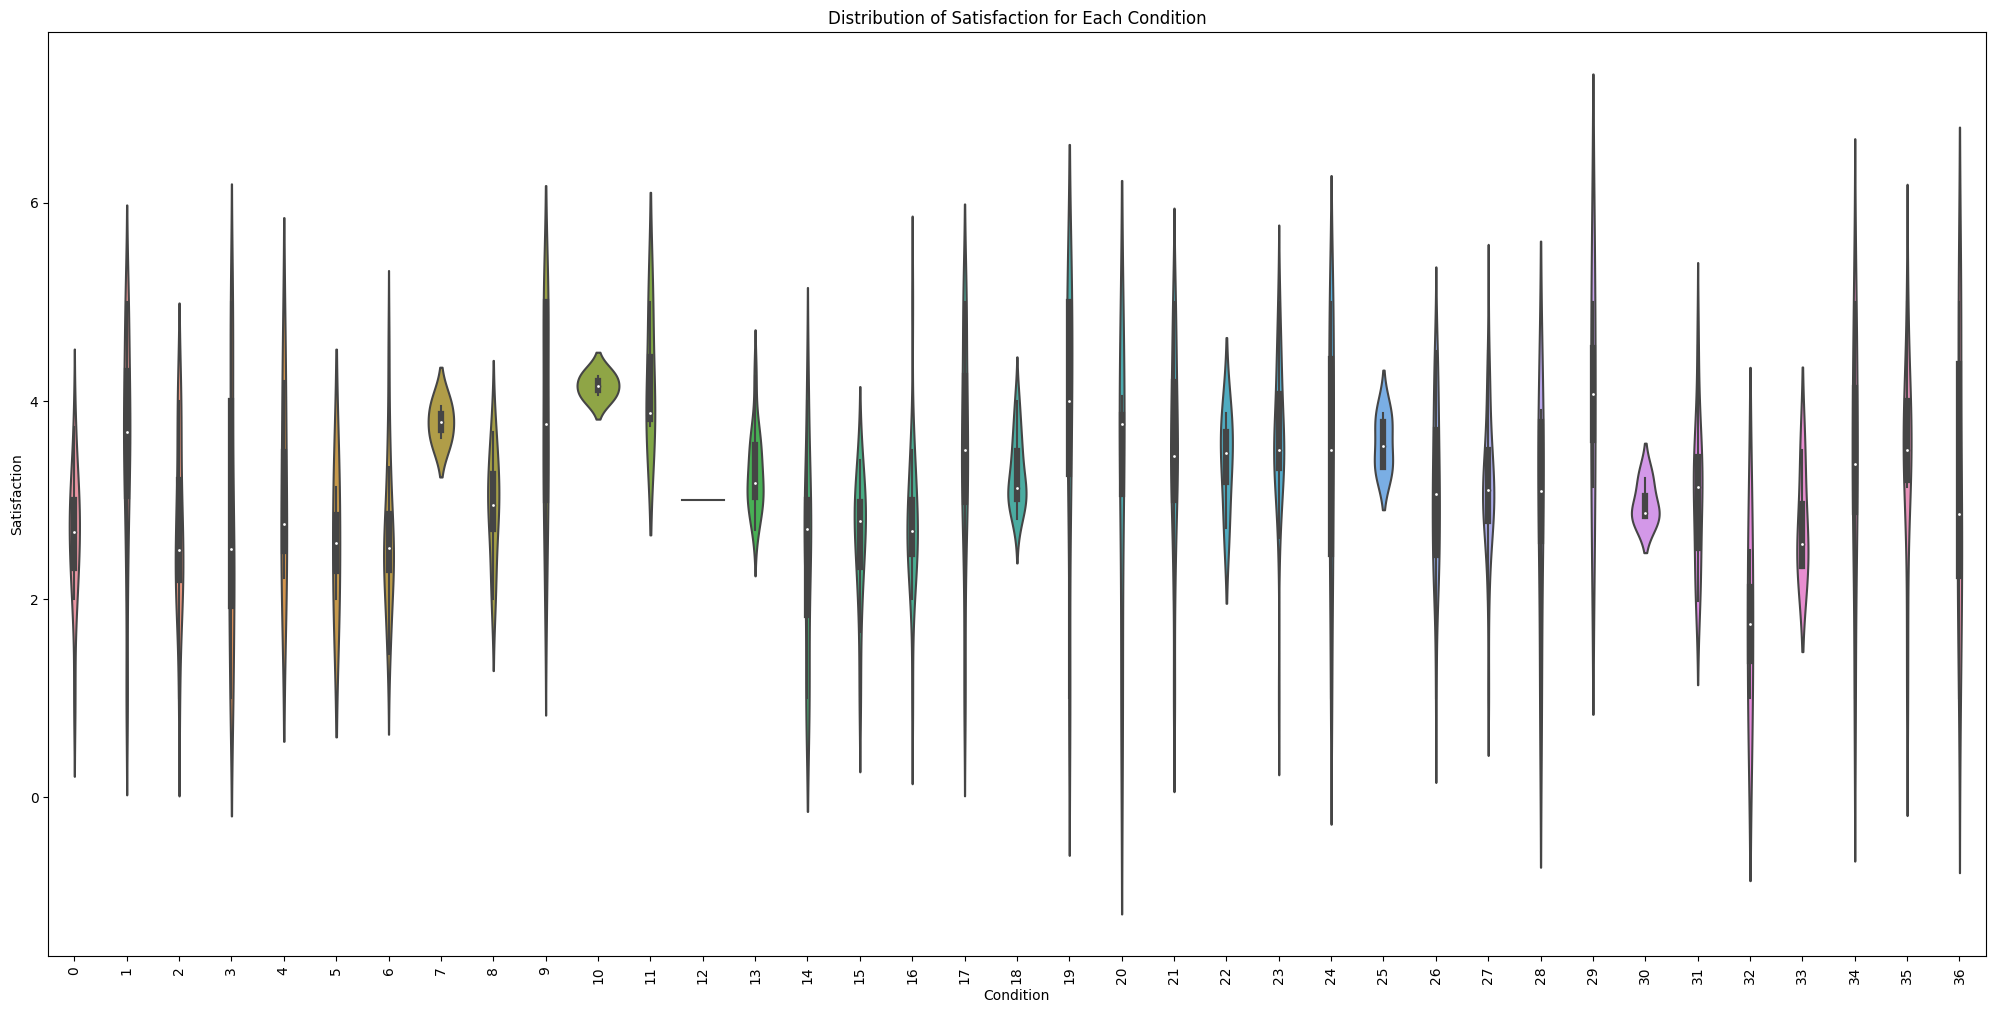

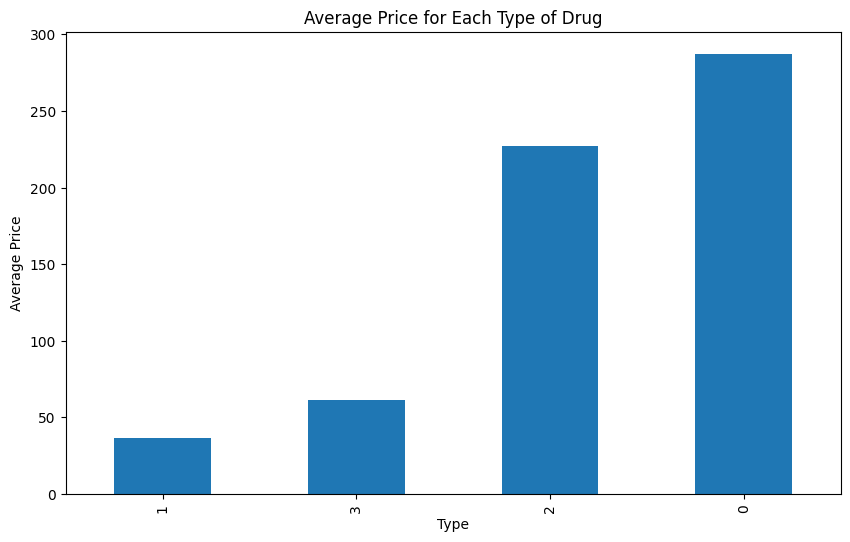

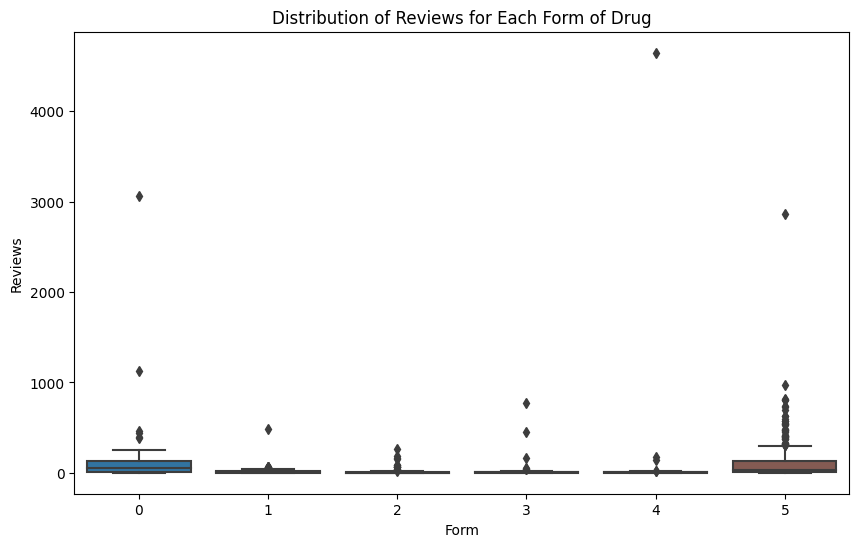

In [17]:
# Heatmap showing the correlation between numerical columns
corr_matrix = df[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter matrix for numerical columns
fig = px.scatter_matrix(df[['EaseOfUse', 'Effective', 'Reviews', 'Satisfaction', 'Price']])
fig.update_layout(title='Scatter Matrix for Numerical Columns')
fig.show()

# Violin plot showing the distribution of 'Satisfaction' for each 'Condition'
plt.figure(figsize=(25,12))
sns.violinplot(x='Condition', y='Satisfaction', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Satisfaction for Each Condition')
plt.show()

# Bar plot showing the average 'Price' for each 'Type' of drug
plt.figure(figsize=(10,6))
df.groupby('Type')['Price'].mean().sort_values().plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price for Each Type of Drug')
plt.show()

# Box plot showing the distribution of 'Reviews' for each 'Form' of drug
plt.figure(figsize=(10,6))
sns.boxplot(x='Form', y='Reviews', data=df)
plt.title('Distribution of Reviews for Each Form of Drug')
plt.show()


# **Hypothesis Testing**

Correlation: -0.02480026556339147, p-value: 0.5169854179460828
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4203
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.517
Time:                        10:06:50   Log-Likelihood:                -991.80
No. Observations:                 685   AIC:                             1988.
Df Residuals:                     683   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

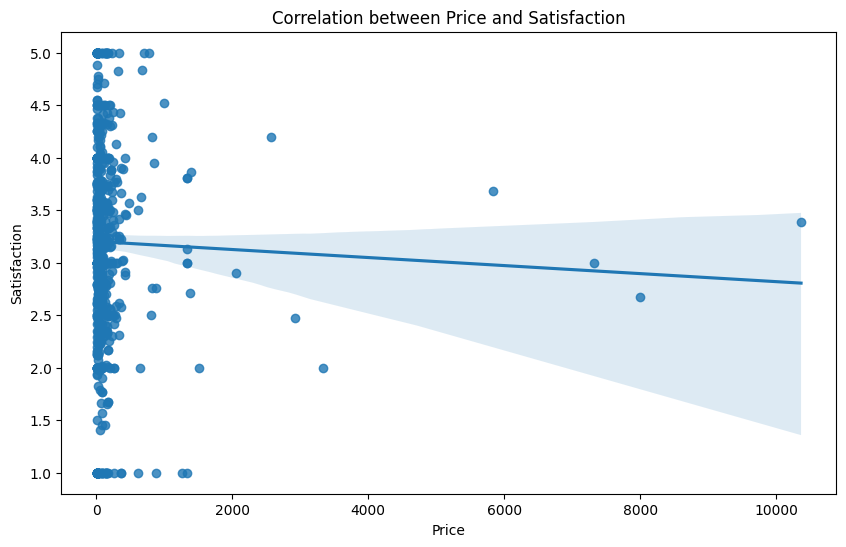

In [19]:
# Hypothesis 1: There is a positive correlation between the price of a drug and its satisfaction rating
# Calculate the correlation between 'Price' and 'Satisfaction'
correlation, p_val = stats.pearsonr(df['Price'], df['Satisfaction'])
print(f"Correlation: {correlation}, p-value: {p_val}")

# Perform a linear regression
X = sm.add_constant(df['Price'])  # Adding a constant (intercept term)
model = sm.OLS(df['Satisfaction'], X)
results = model.fit()
print(results.summary())

# Plot a scatter plot with the regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Price', y='Satisfaction', data=df)
plt.title('Correlation between Price and Satisfaction')
plt.show()

Correlation: -0.024927033151263166, p-value: 0.5148447297972695
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4247
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.515
Time:                        10:06:50   Log-Likelihood:                -5426.4
No. Observations:                 685   AIC:                         1.086e+04
Df Residuals:                     683   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

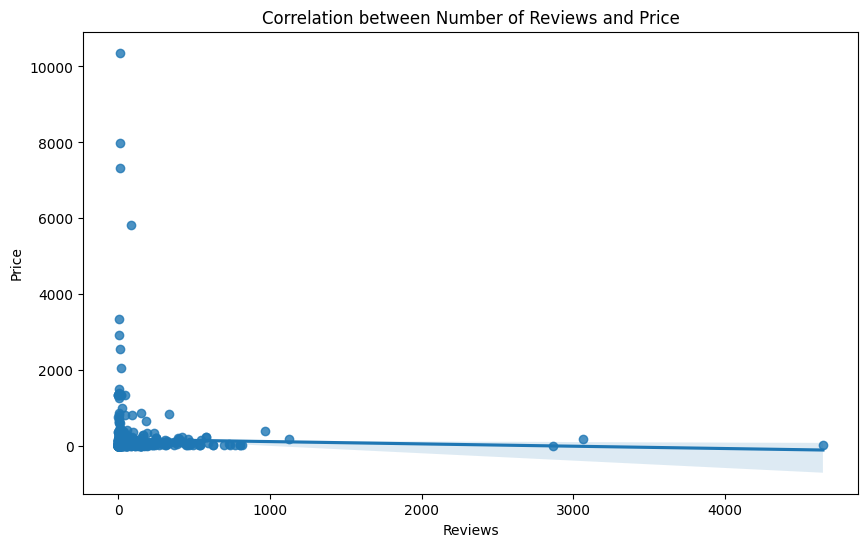

In [20]:
# Hypothesis 2: Drugs with more reviews are more expensive
# Calculate the correlation between 'Reviews' and 'Price'
correlation, p_val = stats.pearsonr(df['Reviews'], df['Price'])
print(f"Correlation: {correlation}, p-value: {p_val}")

# Perform a linear regression
X = sm.add_constant(df['Reviews'])  # Adding a constant (intercept term)
model = sm.OLS(df['Price'], X)
results = model.fit()
print(results.summary())

# Plot a scatter plot with the regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Reviews', y='Price', data=df)
plt.title('Correlation between Number of Reviews and Price')
plt.show()

Correlation: 0.864862862016489, p-value: 1.3579769933287202e-206
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2027.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.36e-206
Time:                        10:06:54   Log-Likelihood:                -519.95
No. Observations:                 685   AIC:                             1044.
Df Residuals:                     683   BIC:                             1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

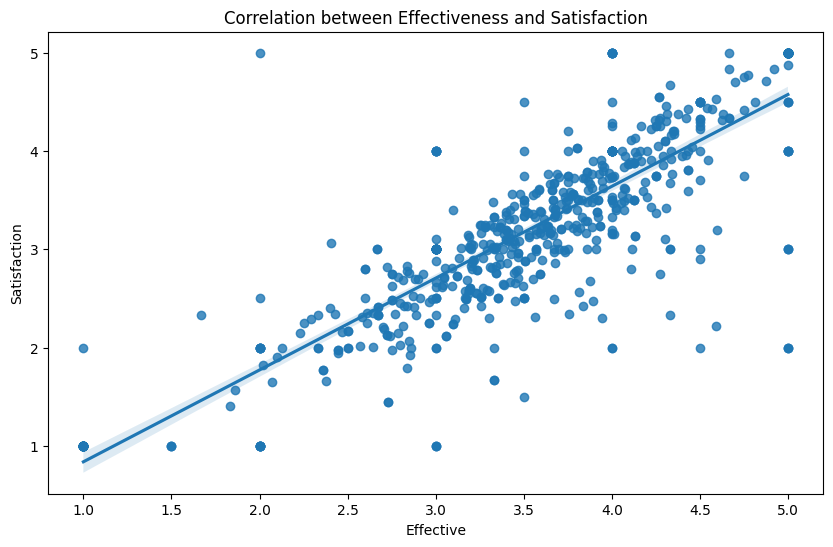

In [24]:
# Hypothesis 3: There is a positive correlation between the effectiveness of a drug and its satisfaction rating
# Calculate the correlation between 'Effective' and 'Satisfaction'
correlation, p_val = stats.pearsonr(df['Effective'], df['Satisfaction'])
print(f"Correlation: {correlation}, p-value: {p_val}")

# Perform a linear regression
X = sm.add_constant(df['Effective'])  # Adding a constant (intercept term)
model = sm.OLS(df['Satisfaction'], X)
results = model.fit()
print(results.summary())

# Plot a scatter plot with the regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Effective', y='Satisfaction', data=df)
plt.title('Correlation between Effectiveness and Satisfaction')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.847
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.137
Time:                        10:06:54   Log-Likelihood:                -4811.9
No. Observations:                 685   AIC:                             9632.
Df Residuals:                     681   BIC:                             9650.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.0215    102.107     -0.

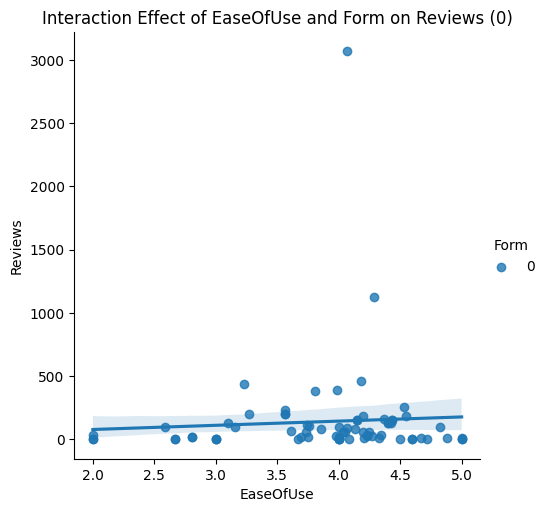

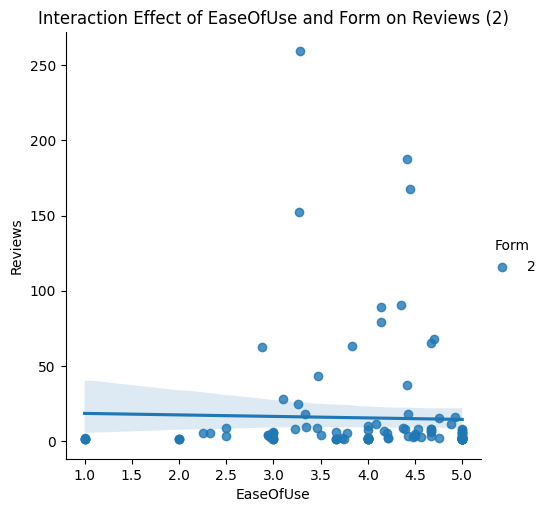

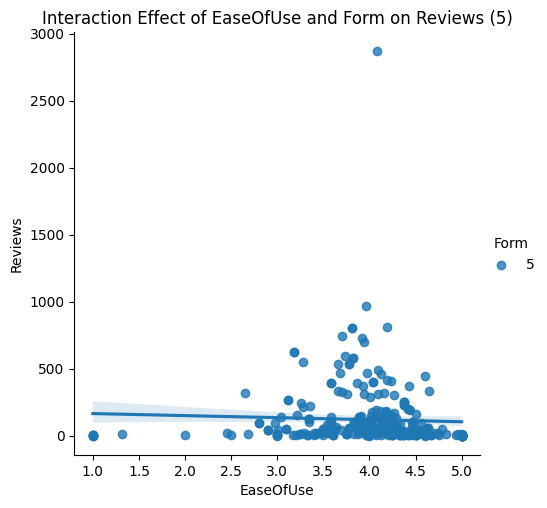

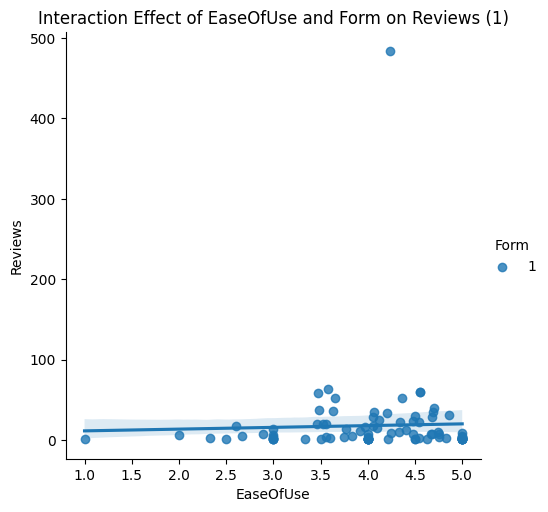

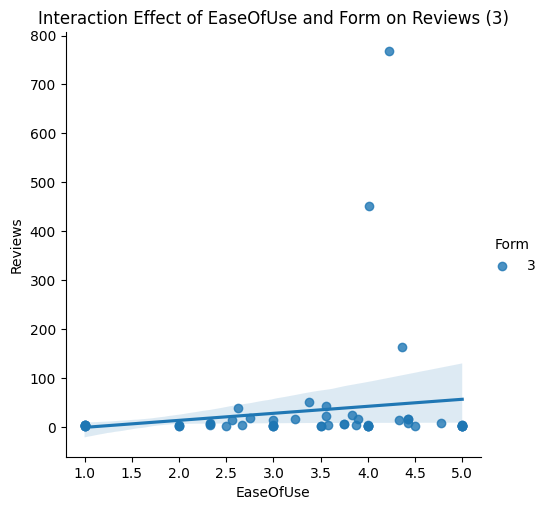

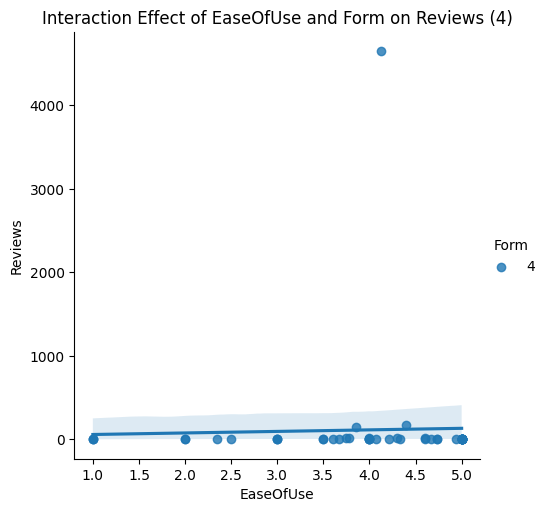

In [26]:
# Hypothesis 4: Drugs that are easier to use receive more reviews, but this effect is different for different 'Forms' of drugs
model = smf.ols('Reviews ~ EaseOfUse * Form', data=df).fit()
print(model.summary())

# Visualize the interaction effect
forms = df['Form'].unique()
for form in forms:
    df_form = df[df['Form'] == form]
    sns.lmplot(x='EaseOfUse', y='Reviews', data=df_form, hue='Form')
    plt.title(f'Interaction Effect of EaseOfUse and Form on Reviews ({form})')
    plt.show()